In [1]:
!pip install h5py
import h5py
import numpy as np

In [2]:
f = h5py.File('cons_locs_pathways_mc2_Column.h5', 'r')

/locations : Nx3 dataset of neuron locations in 3d space (in um; one per neuron in the indicated population)

/nCellAff : Nx1 dataset of number of afferent connections (one per neuron in the indicated population; 
             NOTE: INCLUDES SOME CONNECTIONS FROM NEURONS OUTSIDE THE VOLUME, SEE ABOVE!)
             
/nCellEff : Nx1 dataset of number of efferent connections (one per neuron in the indicated population; 
             NOTE: INCLUDES SOME CONNECTIONS TO NEURONS OUTSIDE THE VOLUME, SEE ABOVE!)
             
/nSynAff : Nx1 dataset of number of afferent synapses (multiple synapses per connection possible)

/nSynEff : Nx1 dataset of number of efferent synapses

In [32]:
popnames = f.get('populations')
popnames = np.array(popnames)
np.savetxt('popnames.txt',popnames, fmt='%s', delimiter=" ")

mtype_map_content = popnames
n=0
mtype_map = {}
for line in mtype_map_content[0:55]:
    n=n+1 
    mtype_map[n] = str(line)    

In [4]:
n=1
poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
poplocation = np.array(poplocation)

poplocation2 = f.get('populations/{s}/nCellAff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = f.get('populations/{s}/nCellEff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = f.get('populations/{s}/nSynAff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = f.get('populations/{s}/nSynEff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = n*np.ones(poplocation2.shape)
poplocation = np.concatenate((poplocation,poplocation2), axis=1)

np.savetxt('xyz_info_{s}.txt'.format(s=mtype_map[n]),poplocation, fmt='%.4f %.4f %.4f %d %d %d %d %d', delimiter=" ")

In [5]:
poplocationb = poplocation
for line in mtype_map_content[0:55-1]:
    n=n+1 
    poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
    poplocation = np.array(poplocation)

    poplocation2 = f.get('populations/{s}/nCellAff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)

    poplocation2 = f.get('populations/{s}/nCellEff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)

    poplocation2 = f.get('populations/{s}/nSynAff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)

    poplocation2 = f.get('populations/{s}/nSynEff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)
        
    poplocation2 = n*np.ones(poplocation2.shape)
    poplocation = np.concatenate((poplocation,poplocation2), axis=1)
    
    poplocationb =  np.concatenate((poplocationb,poplocation), axis=0)

In [6]:
degreeout = poplocationb[:,3].sum(axis=0)
print('number of afferent connections =',int(degreeout))
degreeout = poplocationb[:,4].sum(axis=0)
print('number of efferent connections =',int(degreeout))
degreeout = poplocationb[:,5].sum(axis=0)
print('number of afferent synapses =',int(degreeout))
degreeout = poplocationb[:,6].sum(axis=0)
print('number of efferent synapses =',int(degreeout))

number of afferent connections = 14132808
number of efferent connections = 14163526
number of afferent synapses = 60992747
number of efferent synapses = 61100755


In [7]:
np.savetxt('xyz_info_mc2.txt',poplocationb, fmt='%.4f %.4f %.4f %d %d %d %d %d', delimiter=" ")

In [8]:
n=1
poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
poplocation = np.array(poplocation)
np.savetxt('xyz_{s}.txt'.format(s=mtype_map[n]),poplocation, fmt='%f', delimiter=" ")

In [9]:
n=1
m=1
matrix = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
matrix = np.array(matrix)
np.savetxt('matrix_{s}-{s2}.txt'.format(s=mtype_map[n],s2=mtype_map[m]),matrix, fmt='%d', delimiter=" ")

In [10]:
n=1
matrix = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[1],s2=mtype_map[1]))
matrix = np.array(matrix)
degreeout = matrix.sum(axis=0)
sumdeg = degreeout.sum(axis=0)
print(sumdeg)
# iterate through rows
for i in range(len(mtype_map)-1):
    n=n+1 
    matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[1]))
    matrix2 = np.array(matrix2)
    matrix = np.concatenate((matrix,matrix2), axis=0)
    degreeout = matrix.sum(axis=0)
    sumdeg = degreeout.sum(axis=0)

print(sumdeg)

33
1555


In [11]:
#np.savetxt('matrix_{s}-full.txt'.format(s=mtype_map[1]),matrix, fmt='%d', delimiter=" ")

In [12]:
m=1
n=1
matrix = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[1],s2=mtype_map[1]))
matrix = np.array(matrix)
# iterate through rows
for i in range(len(mtype_map)-1):
    n=n+1 
    matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
    matrix2 = np.array(matrix2)
    matrix = np.concatenate((matrix,matrix2), axis=0)
    
degreeout = matrix.sum(axis=0)
sumdeg = degreeout.sum(axis=0)
print (sumdeg,matrix.shape)    

for j in range(len(mtype_map)-1):
    m=m+1
    n=1
    matrixb = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
    matrixb = np.array(matrixb)
    # iterate through rows
    for i in range(len(mtype_map)-1):
        n=n+1 
        matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
        matrix2 = np.array(matrix2)
        matrixb = np.concatenate((matrixb,matrix2), axis=0)

    matrix = np.concatenate((matrix,matrixb), axis=1)
    #print (matrix.shape)
    degreeout = matrix.sum(axis=0)
    sumdeg = degreeout.sum(axis=0)

print(sumdeg,matrix.shape)

1555 (31346, 58)
7803528 (31346, 31346)


In [13]:
degreeout = matrix.sum(axis=0)
sumdeg = degreeout.sum(axis=0)
print(degreeout)
print(sumdeg)
degreein = matrix.sum(axis=1)
sumdeg = degreein.sum(axis=0)
print(degreein)
print(sumdeg)

[111  14 163 ... 265 472 662]
7803528
[260   4 289 ... 353 616 373]
7803528


In [14]:
np.savetxt('degree-out.txt',degreeout, fmt='%d', delimiter=" ")
np.savetxt('degree-in.txt',degreein, fmt='%d', delimiter=" ")

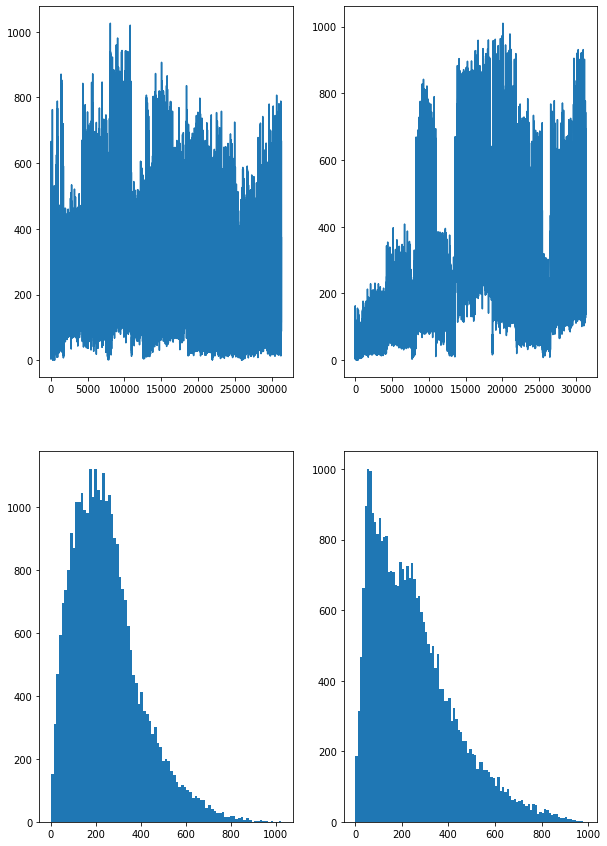

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,15))
ax = figure.add_subplot(221)
ax2 = figure.add_subplot(222)
ax3 = figure.add_subplot(223)
ax4 = figure.add_subplot(224)
_ = ax.plot(degreein)
_ = ax2.plot(degreeout)
_ = ax3.hist(degreein, bins='auto') 
_ = ax4.hist(degreeout, bins=np.arange(0,1000,10)) 

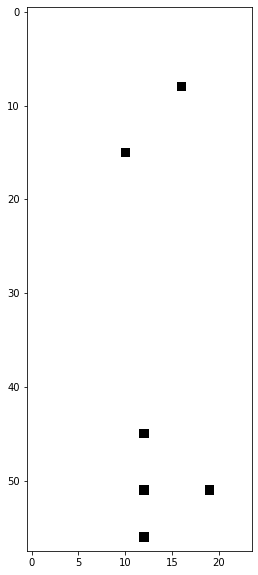

In [16]:
fig = plt.figure(figsize=(10, 10)) 
plt.imshow(matrix[0:58,58:82],cmap="Greys",interpolation="none")

In [17]:
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

57 81 93.97816415547295 3
57 81 285.5356197593923 251
prob =  1.1952191235059761 %


In [33]:
 mtype_map2 = mtype_map

In [35]:
mtype_map[1] = 'L1_DAC'
mtype_map[2] = 'L1_NGC-DA'
mtype_map[3] = 'L1_NGC-SA'
mtype_map[4] = 'L1_HAC'
mtype_map[5] = 'L1_DLAC'
mtype_map[6] = 'L1_SLAC'
mtype_map[7] = 'L23_PC'
mtype_map[8] = 'L23_MC'
mtype_map[9] = 'L23_BTC'
mtype_map[10] = 'L23_DBC'
mtype_map[11] = 'L23_BP'
mtype_map[12] = 'L23_NGC'
mtype_map[13] = 'L23_LBC'
mtype_map[14] = 'L23_NBC'
mtype_map[15] = 'L23_SBC'
mtype_map[16] = 'L23_ChC'
mtype_map[17] = 'L4_PC'
mtype_map[18] = 'L4_SP'
mtype_map[19] = 'L4_SS'
mtype_map[20] = 'L4_MC'
mtype_map[21] = 'L4_BTC'
mtype_map[22] = 'L4_DBC'
mtype_map[23] = 'L4_BP'
mtype_map[24] = 'L4_NGC'
mtype_map[25] = 'L4_LBC'
mtype_map[26] = 'L4_NBC'
mtype_map[27] = 'L4_SBC'
mtype_map[28] = 'L4_ChC'
mtype_map[29] = 'L5_TTPC1'
mtype_map[30] = 'L5_TTPC2'
mtype_map[31] = 'L5_UTPC'
mtype_map[32] = 'L5_STPC'
mtype_map[33] = 'L5_MC'
mtype_map[34] = 'L5_BTC'
mtype_map[35] = 'L5_DBC'
mtype_map[36] = 'L5_BP'
mtype_map[37] = 'L5_NGC'
mtype_map[38] = 'L5_LBC'
mtype_map[39] = 'L5_NBC'
mtype_map[40] = 'L5_SBC'
mtype_map[41] = 'L5_ChC'
mtype_map[42] = 'L6_TPC_L1'
mtype_map[43] = 'L6_TPC_L4'
mtype_map[44] = 'L6_UTPC'
mtype_map[45] = 'L6_IPC'
mtype_map[46] = 'L6_BPC'
mtype_map[47] = 'L6_MC'
mtype_map[48] = 'L6_BTC'
mtype_map[49] = 'L6_DBC'
mtype_map[50] = 'L6_BP'
mtype_map[51] = 'L6_NGC'
mtype_map[52] = 'L6_LBC'
mtype_map[53] = 'L6_NBC'
mtype_map[54] = 'L6_SBC'
mtype_map[55] = 'L6_ChC'

7 17 0.11269534220009247 143.2114240550684 0.056059844636269125 25 0.09513072557762464 0.0802706263802396 0.0664070830254368 0.0548435740087657 0.04573860826882232 0.03867388731901124

 L23_PC L4_PC 148607 2709652
connections_total 265407


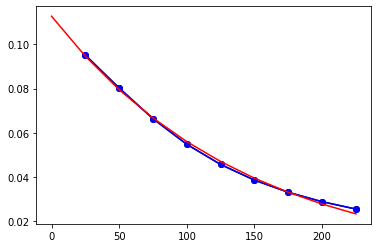

In [44]:
from scipy.optimize import curve_fit

Netinfo = {}

def exponential(x, a, b):
    return a*np.exp(-b*x)

for n in range(7,8):

    poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
    poplocation = np.array(poplocation)

    for m in range(17,18):

            prob2D = []
            d2D = []

            poplocation2 = f.get('populations/{s}/locations'.format(s=mtype_map[m]))
            poplocation2 = np.array(poplocation2)

            matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
            matrix2 = np.array(matrix2)

            nn, mm = matrix2.shape

            n0 = 0
            n1 = 0
            n2 = 0
            n3 = 0
            n4 = 0
            n5 = 0
            n6 = 0
            n7 = 0
            n8 = 0
            n9 = 0
            for i in range(0,nn):
                for j in range(0,mm):
                    if matrix2[i,j] > 0:
                        Dist_2D = np.sqrt((poplocation[i,0] - poplocation2[j,0])**2 + (poplocation[i,2] - poplocation2[j,2])**2)
                        n9 = n9 + 1
                        if Dist_2D < 25.0:
                            n0 = n0 + 1 
                        if Dist_2D < 50.0:
                            n1 = n1 + 1 
                        if Dist_2D < 75.0:                            
                            n2 = n2 + 1 
                        if Dist_2D < 100.0:
                            n3 = n3 + 1 
                        if Dist_2D < 125.0:
                            n4 = n4 + 1 
                        if Dist_2D < 150.0:
                            n5 = n5 + 1 
                        if Dist_2D < 175.0:
                            n6 = n6 + 1 
                        if Dist_2D < 200.0:
                            n7 = n7 + 1 
                        if Dist_2D < 225.0:
                            n8 = n8 + 1 
            m0 = n0      
            m1 = n1      
            m2 = n2
            m3 = n3    
            m4 = n4
            m5 = n5    
            m6 = n6
            m7 = n7    
            m8 = n8
            m9 = n9   

            n0 = 0
            n1 = 0
            n2 = 0
            n3 = 0
            n4 = 0
            n5 = 0
            n6 = 0
            n7 = 0
            n8 = 0
            n9 = 0
            for i in range(0,nn):
                for j in range(0,mm):
                    if matrix2[i,j] > -10:
                        Dist_2D = np.sqrt((poplocation[i,0] - poplocation2[j,0])**2 + (poplocation[i,2] - poplocation2[j,2])**2)
                        n9 = n9 + 1
                        if Dist_2D < 25.0:
                            n0 = n0 + 1 
                        if Dist_2D < 50.0:
                            n1 = n1 + 1 
                        if Dist_2D < 75.0:
                            n2 = n2 + 1 
                        if Dist_2D < 100.0:
                            n3 = n3 + 1 
                        if Dist_2D < 125.0:
                            n4 = n4 + 1 
                        if Dist_2D < 150.0:
                            n5 = n5 + 1 
                        if Dist_2D < 175.0:
                            n6 = n6 + 1 
                        if Dist_2D < 200.0:
                            n7 = n7 + 1 
                        if Dist_2D < 225.0:
                            n8 = n8 + 1 

            if n0 > 0:
                prob2D.append(m0/n0)
            else:            
                prob2D.append(0)

            if n1 > 0:
                prob2D.append(m1/n1)
            else:            
                prob2D.append(0)
                
            if n2 > 0:
                prob2D.append(m2/n2)   
            else:            
                prob2D.append(0)
                
            if n3 > 0:     
                prob2D.append(m3/n3)
            else:            
                prob2D.append(0)
                
            if n4 > 0:
                prob2D.append(m4/n4)
            else:            
                prob2D.append(0)
                
            if n5 > 0:
                prob2D.append(m5/n5)
            else:            
                prob2D.append(0)
                
            if n6 > 0:
                prob2D.append(m6/n6)
            else:            
                prob2D.append(0)
                
            if n7 > 0:
                prob2D.append(m7/n7)
            else:            
                prob2D.append(0)
                
            if n8 > 0:
                prob2D.append(m8/n8)   
            else:            
                prob2D.append(0)             
                        
            d2D.append(25)
            d2D.append(50) 
            d2D.append(75)     
            d2D.append(100)
            d2D.append(125)
            d2D.append(150)
            d2D.append(175)    
            d2D.append(200)      
            d2D.append(225)

            if m6 > 0: # minimum 3 points

                x = d2D
                y = prob2D
                
                if max(y) == y[0]: # 25 um 
                    starts = 0
                elif max(y[3:]) == y[3]:
                    starts = 3 # 100 um 
                elif max(y[4:]) == y[4]:
                    starts = 4 # 125 um 
                else:
                    starts = 5 # 150 um 

                x = d2D[starts:]
                y = prob2D[starts:]

                if m0 == 0:
                    if starts > 0:
                        starts = starts - 1
                    x = d2D[1+starts:]
                    y = prob2D[1+starts:]
                if m1 == 0:
                    if starts > 0:
                        starts = starts - 1
                    x = d2D[2+starts:]
                    y = prob2D[2+starts:]
                if m2 == 0:
                    if starts > 0:
                        starts = starts - 1
                    x = d2D[3+starts:]
                    y = prob2D[3+starts:]
                if m3 == 0:
                    if starts > 0:
                        starts = starts - 1
                    x = d2D[4+starts:]
                    y = prob2D[4+starts:]
                if m4 == 0:
                    x = d2D[5:]
                    y = prob2D[5:]
                if m5 == 0:
                    x = d2D[6:]
                    y = prob2D[6:]

                pars, cov = curve_fit(f=exponential, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

                xx = np.linspace(0, 225, 10)
                yy = exponential(xx, *pars)
                prob100 = yy[4]

            else:
                x = d2D
                y = prob2D

                pars[0] = m9/n9
                pars[1] = 0.0001 #shape = 10000 ~ linear
                prob100 = pars[0]

            
            print(n,m,pars[0],1.0/pars[1],prob100,x[0],prob2D[0],prob2D[1],prob2D[2],prob2D[3],prob2D[4],prob2D[5])

            print("\n",mtype_map[n],mtype_map[m],m3,n3)
            # print("connection_probability %.3f" % (100*m3/n3))
            print("connections_total", m9)
            # print("number_of_convergent_neuron_mean %.3f" % (m9/mm))
            # print("number_of_divergent_neuron_mean %.3f" % (m9/nn))

            plt.plot(d2D, prob2D, 'k-o', label='data')
            plt.plot(x, y, 'b-o', label='data')
            plt.plot(xx, yy, 'r-', label='fit')

            if m9 > 0:                
                proj = '%s:%s' % (mtype_map[n],mtype_map[m])
                Netinfo[proj] = {}
                Netinfo[proj]['A0'] = pars[0]
                Netinfo[proj]['shape'] = 1.0/pars[1]
                Netinfo[proj]['connection_probability'] = prob100    
                Netinfo[proj]['dist2D_0'] = x[0]       
                Netinfo[proj]['connection_probability_25um'] = prob2D[0]
                Netinfo[proj]['connection_probability_50um'] = prob2D[1]
                Netinfo[proj]['connection_probability_75um'] = prob2D[2]
                Netinfo[proj]['connection_probability_100um'] = prob2D[3]
                Netinfo[proj]['connection_probability_125um'] = prob2D[4]
                Netinfo[proj]['connection_probability_150um'] = prob2D[5]
                Netinfo[proj]['connections_total'] = m9
                Netinfo[proj]['number_of_convergent_neuron_mean'] = m9/mm
                Netinfo[proj]['number_of_divergent_neuron_mean'] = m9/nn        

In [45]:
prob2D

[0.09513072557762464,
 0.0802706263802396,
 0.0664070830254368,
 0.0548435740087657,
 0.04573860826882232,
 0.03867388731901124,
 0.03318804532331138,
 0.02893305459211482,
 0.025613523333038582]

In [20]:
# import json
# Netinfo
# with open('Netconnections_mc2.json', 'w') as outfile:
#     json.dump(Netinfo, outfile)

In [21]:
if max(y) == y[0]:
    starts = 0
elif max(y) == y[1]:
    starts = 1
else:
    starts = 3

    print(max(y) == y[0])
    print(min(y[0:4]) == y[3])


In [22]:
print(xx[4],100*yy[4])

100.0 2.7653175938781747


5.528527983203704 144.34886421349296


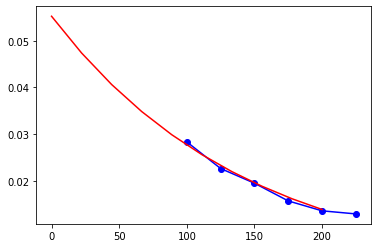

In [23]:
from scipy.optimize import curve_fit

def exponential(x, a, b):
    return a*np.exp(-b*x)

pars, cov = curve_fit(f=exponential, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

xx = np.linspace(0, 200, 10)
yy = exponential(xx, *pars)

print(100*pars[0],1.0/pars[1])

plt.plot(x, y, 'b-o', label='data')
plt.plot(xx, yy, 'r-', label='fit')

In [24]:
cov

array([[1.47008426e-05, 1.77770141e-06],
       [1.77770141e-06, 2.31433530e-07]])